In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn

from torch import optim
from torch.nn import functional as F

from tqdm import tqdm
from IPython.display import clear_output

import utils
import models

import os
os.environ["CUDA_VISIBLE_DEVICES"]="3"

%matplotlib inline

In [3]:
trainloader, validloader, vocab, word2id, id2word = utils.prepare_imdb_dataloaders(path_to_pkl='data/matrix.pkl',
                                                                            forward=True)

Data has been successfully loaded


In [5]:
validloader.dataset.tensors

(tensor([[    1,   546, 74499,  ..., 10241,    96, 30984],
         [    1, 66346, 67249,  ..., 66346, 70932, 16891],
         [    1, 43632, 55481,  ..., 65746, 40889, 18464],
         ...,
         [    1, 66346,  2597,  ..., 53776, 67334, 75037],
         [    1, 72948, 13326,  ..., 24828, 54576, 21139],
         [    1, 71857, 57109,  ..., 69596, 57665, 42702]]),)

In [3]:
batch_size = 64
hidden_dim = 256
linear_dim = 256
embedding_dim = 128
vocab_size = len(vocab) + 2
n_layers = 1

model = models.language_model.LanguageModel(hidden_dim, vocab_size, embedding_dim, 
                                            linear_dim, n_layers, train_on_gpu=True)

In [4]:
opt = torch.optim.Adam(model.parameters(), lr=1e-3)

Epoch [17/100], Loss: 3.7906


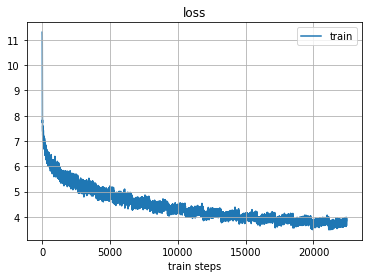

  0%|          | 2/1320 [00:00<01:44, 12.65it/s]

6.732883586392382
Epoch:  17


  5%|▍         | 64/1320 [00:04<01:33, 13.45it/s]


KeyboardInterrupt: 

In [5]:
models.language_model.train(model, opt, 18, trainloader, validloader, train_on_gpu=True, path='pretrained_forward.pt', print_every=1)